## Imports and functions

In [79]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

In [80]:
def load_data():
    '''
    A function for loading csv data into dataframe df.
    '''

    #Location of csv file
    csv_file = '../air-pollution-levels/raw_data/air_pollution_data.csv'

    #Loading csv file into df dataframe
    df = pd.read_csv(csv_file)

    return df

In [144]:
#load date
df = load_data()

In [146]:
df.head(50)

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,pm25_tempcov,no2_tempcov,type_of_stations,reference,web_link,population,population_source,latitude,longitude,who_ms
0,4_Eur,ESP,Spain,A Coruna/ESP,2013.0,"V4.0 (2018), V4.0 (2018), V4.0 (2018), V4.0 (2...",23.238,11.491,28.841,87.0,46.0,93.0,"Urban, Urban, Suburban",NaN,NaN,246146.0,"manual, manual, manual, manual",43.367900,-8.418571,1
1,4_Eur,ESP,Spain,A Coruna/ESP,2014.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023)",27.476,15.878,19.575,96.0,88.0,95.0,"Urban, Urban, Suburban",NaN,NaN,247604.0,NaN,43.368033,-8.418233,1
2,4_Eur,ESP,Spain,A Coruna/ESP,2015.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",25.515,14.004,22.731,98.0,71.0,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1
3,4_Eur,ESP,Spain,A Coruna/ESP,2016.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",23.057,13.160,20.204,98.0,98.0,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1
4,4_Eur,ESP,Spain,A Coruna/ESP,2017.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",26.849,14.114,21.543,97.0,97.0,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1
5,4_Eur,ESP,Spain,A Coruna/ESP,2018.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",27.763,14.876,20.328,98.0,86.0,99.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1
6,4_Eur,ESP,Spain,A Coruna/ESP,2019.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",26.912,13.017,18.339,98.0,95.0,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1
7,4_Eur,ESP,Spain,A Coruna/ESP,2020.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023)",24.900,12.926,13.749,99.0,98.0,99.0,"Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.371467,-8.423667,1
8,4_Eur,ESP,Spain,A Coruna/ESP,2021.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023)",23.228,11.617,15.670,99.0,98.0,99.0,"Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.371467,-8.423667,1
9,6_Wpr,CHN,China,A La Shan Zuo Qi/CHN,2015.0,V5.0 (2022),NaN,33.015,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,38.839500,105.692150,1


In [126]:
df.shape

(40098, 20)

In [83]:
#preprocess functions
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df):
    # Step 1: Data Cleaning
    df = clean_data(df)

    # Step 2: Simplify Station Types
    #df = simplified_station_type(df)

    # Step 3: Impute Missing Station Types
    df = impute_stations(df)

    # Step 4: Encode Country and City Names
    df = encode_categorical_features(df)

    # Step 5: Classify Concentrations
    df = classify_concentrations(df)

    return df

def clean_data(df):
    '''
    Cleans the DataFrame by:
    - Dropping unuseful columns
    - Dropping rows with year = NA
    - Dropping rows where all pollutant concentrations (pm10_concentration, pm25_concentration, no2_concentration) are NA
    '''
    df.drop(columns=[
        'web_link', 'reference', 'iso3', 'who_ms', 'population_source',
        'version', 'pm10_tempcov', 'pm25_tempcov', 'no2_tempcov'
    ], inplace=True)

    df.dropna(subset=['year'], inplace=True)

    df.dropna(how='all', subset=[
        'pm10_concentration', 'pm25_concentration', 'no2_concentration'
    ], inplace=True)

    return df

def simplify_stations(station_type):
    if pd.isna(station_type):
        return "unknown"
    unique_types = sorted(set(station_type.split(', ')))
    return ', '.join(unique_types)

def simplified_station_type(df):
    df['type_of_stations'] = df['type_of_stations'].astype('string')
    df['simplified_station_type'] = df['type_of_stations'].apply(simplify_stations)
    return df

def impute_stations(df):

    simplified_station_type(df)

    type_mapping = {
        'Unknown': np.nan,
        'Urban': 1, 'Rural': 2, 'Suburban': 3, 'Suburban, Urban': 4,
        'Rural, Urban': 5, 'Rural, Suburban, Urban': 6, 'Rural, Suburban': 7,
        'Background': 8, 'Residential And Commercial Area': 9,
        'Traffic': 10, 'Residential And Commercial Area, Urban Traffic': 11,
        'Background, Traffic': 12, 'Industrial': 13,
        'Industrial, Urban': 15, 'Industrial, Rural, Urban': 16,
        'Residential': 17, 'Fond Urbain, Traffic': 18,
        'Residential - industrial': 19
    }

    df['encoded_station_type'] = df['simplified_station_type'].map(type_mapping)

    features = [
        'pm10_concentration', 'pm25_concentration', 'no2_concentration',
        'encoded_station_type'
    ]

    imputer = KNNImputer(n_neighbors=5)
    df_imputed = imputer.fit_transform(df[features])

    df['encoded_station_type_imputed'] = df_imputed[:, -1]

    reverse_mapping = {v: k for k, v in type_mapping.items() if pd.notna(v)}

    df['final_station_type'] = df['encoded_station_type_imputed'].round().astype(int).map(reverse_mapping).fillna(np.nan)

    return df

def classify_concentrations(df):
    no2_limits = [0, 40, 90, 120, 230, 340, 1000]
    pm10_limits = [0, 10, 20, 25, 50, 75, 800]
    pm25_limits = [0, 20, 40, 50, 100, 150, 1200]

    df['pm10_class'] = pd.cut(df['pm10_concentration'], bins=pm10_limits, labels=[1, 2, 3, 4, 5, 6])
    df['pm25_class'] = pd.cut(df['pm25_concentration'], bins=pm25_limits, labels=[1, 2, 3, 4, 5, 6])
    df['no2_class'] = pd.cut(df['no2_concentration'], bins=no2_limits, labels=[1, 2, 3, 4, 5, 6])

    df['target_class'] = df[['no2_class', 'pm10_class', 'pm25_class']].max(axis=1)

    df.drop(columns=['pm10_class', 'no2_class', 'pm25_class'], inplace=True)

    return df

def encode_categorical_features(df):
    # Label Encoding
    le_country = LabelEncoder()
    le_city = LabelEncoder()

    df['country_name_encoded'] = le_country.fit_transform(df['country_name'])
    df['city_encoded'] = le_city.fit_transform(df['city'])

    df.drop(columns=['country_name', 'city'], inplace=True)

    return df


## Preprocess

In [94]:
#create copy df
df2 = df.copy()
df2.shape

(40098, 20)

In [95]:
#preprocess data for model
data = preprocess_data(df2)
data.head(2)

,who_region,year,pm10_concentration,pm25_concentration,no2_concentration,type_of_stations,population,latitude,longitude,simplified_station_type,encoded_station_type,encoded_station_type_imputed,final_station_type,country_name_encoded,city_encoded,target_class
0,4_Eur,2013.0,23.238,11.491,28.841,"Urban, Urban, Suburban",246146.0,43.367900,-8.418571,"Suburban, Urban",4.0,4.0,"Suburban, Urban",103,0,3
1,4_Eur,2014.0,27.476,15.878,19.575,"Urban, Urban, Suburban",247604.0,43.368033,-8.418233,"Suburban, Urban",4.0,4.0,"Suburban, Urban",103,0,4


In [96]:
data.shape

(40002, 16)

In [97]:
#check nans
data.isna().sum()

who_region                          0
year                                0
pm10_concentration              11330
pm25_concentration              18273
no2_concentration               13068
type_of_stations                16695
population                      17637
latitude                            0
longitude                           0
simplified_station_type             0
encoded_station_type            16702
encoded_station_type_imputed        0
final_station_type                  0
country_name_encoded                0
city_encoded                        0
target_class                        0
dtype: int64

In [98]:
#drop rows with nans
data.dropna(axis=0, inplace=True)

In [99]:
#2nd check for nans
data.isna().sum()#info()

who_region                      0
year                            0
pm10_concentration              0
pm25_concentration              0
no2_concentration               0
type_of_stations                0
population                      0
latitude                        0
longitude                       0
simplified_station_type         0
encoded_station_type            0
encoded_station_type_imputed    0
final_station_type              0
country_name_encoded            0
city_encoded                    0
target_class                    0
dtype: int64

In [100]:
data.shape
#now left with 4k rows down from 40k

(4212, 16)

In [101]:
#import ML libraries
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

In [102]:
#list columns in data DataFrame
data.columns

Index(['who_region', 'year', 'pm10_concentration', 'pm25_concentration',
       'no2_concentration', 'type_of_stations', 'population', 'latitude',
       'longitude', 'simplified_station_type', 'encoded_station_type',
       'encoded_station_type_imputed', 'final_station_type',
       'country_name_encoded', 'city_encoded', 'target_class'],
      dtype='object')

In [103]:
#drop unrequired columns
data.drop(columns=['who_region', 'type_of_stations', 'simplified_station_type', 'encoded_station_type','final_station_type'], inplace=True)
data.head(2)

,year,pm10_concentration,pm25_concentration,no2_concentration,population,latitude,longitude,encoded_station_type_imputed,country_name_encoded,city_encoded,target_class
0,2013.0,23.238,11.491,28.841,246146.0,43.367900,-8.418571,4.0,103,0,3
1,2014.0,27.476,15.878,19.575,247604.0,43.368033,-8.418233,4.0,103,0,4


In [104]:
# Split data into training and testing sets
X = data.drop(columns=['target_class'])  # Features
y = data['target_class']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Dummy model

In [141]:
model_dummy = DummyClassifier(strategy='stratified')

model_dummy.fit(X_train,y_train)

model_dummy.predict(X_test)

trains_score = model_dummy.score(X_train, y_train)
test_score = model_dummy.score(X_test, y_test)

print (trains_score, test_score)

0.3348032564450475 0.307753164556962


## Random Forest Classifier

In [142]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00       496
           3       1.00      1.00      1.00       373
           4       1.00      1.00      1.00       366
           5       1.00      0.94      0.97        16
           6       1.00      1.00      1.00         1

    accuracy                           1.00      1264
   macro avg       1.00      0.99      0.99      1264
weighted avg       1.00      1.00      1.00      1264



## Bagging / Stacking classifier

In [149]:
# Initialize base classifiers
base_rf = RandomForestClassifier(random_state=42)
base_dt = DecisionTreeClassifier(random_state=42)
base_gb = GradientBoostingClassifier(random_state=42)
base_knn = KNeighborsClassifier()
base_ridge = RidgeClassifier()

# Initialize Bagging Classifiers for each base estimator
bagging_rf = BaggingClassifier(estimator=base_rf, n_estimators=10, random_state=42)
bagging_dt = BaggingClassifier(estimator=base_dt, n_estimators=10, random_state=42)
bagging_gb = BaggingClassifier(estimator=base_gb, n_estimators=10, random_state=42)
bagging_knn = BaggingClassifier(estimator=base_knn, n_estimators=10, random_state=42)
bagging_ridge = BaggingClassifier(estimator=base_ridge, n_estimators=10, random_state=42)

# List of bagging classifiers
bagging_classifiers = [
    ('Random Forest', bagging_rf),
    ('Decision Tree', bagging_dt),
    ('Gradient Boosting', bagging_gb),
    ('KNN', bagging_knn),
    ('Ridge', bagging_ridge)
]

# Train and evaluate each bagging classifier
for name, bagging_clf in bagging_classifiers:
    bagging_clf.fit(X_train, y_train)
    y_pred = bagging_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - Accuracy: {accuracy}")


Random Forest - Accuracy: 0.9992088607594937
Decision Tree - Accuracy: 1.0
Gradient Boosting - Accuracy: 1.0
KNN - Accuracy: 0.6811708860759493
Ridge - Accuracy: 0.6859177215189873


In [150]:
#Voting Classifier
#Random Forest, Decision Tree seem to be overfiiting, maybe because data is now 4k rows after preprocessing. Check with other re population updates and concentration updates.
# meanwhile, try applying voting model to try and reduce overfitting

from sklearn.ensemble import VotingClassifier

# Initialize base classifiers
base_rf = RandomForestClassifier(random_state=42)
base_gb = GradientBoostingClassifier(random_state=42)
base_knn = KNeighborsClassifier(n_neighbors=3)
base_ridge = RidgeClassifier()

# Initialize Voting Classifier with estimators and voting strategy
voting_clf = VotingClassifier(estimators=[
    ('rf', base_rf),
    ('gb', base_gb),
    ('knn', base_knn),
    ('ridge', base_ridge)
], voting='hard')  # 'hard' voting means majority rule voting

# Fit the Voting Classifier on the training data
voting_clf.fit(X_train, y_train)

# Predictions
y_pred = voting_clf.predict(X_test)

# Evaluate the Voting Classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier - Accuracy: {accuracy}")

Voting Classifier - Accuracy: 0.9169303797468354


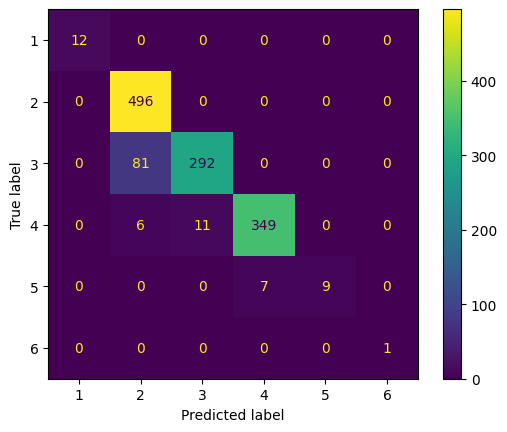

In [151]:
#print confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions
y_pred = voting_clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=voting_clf.classes_)
disp.plot()

import matplotlib.pyplot as plt
plt.show()

### Perform grid search for optimal parameters

In [152]:
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'random_state': [42]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 10],
    'random_state': [42]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'p': [1, 2]
}

param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'random_state': [42]
}

In [153]:
from sklearn.model_selection import GridSearchCV

grid_search_rf = GridSearchCV(base_rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100], 'random_state': [42]},
             scoring='accuracy')

In [154]:

grid_search_gb = GridSearchCV(base_gb, param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [50, 100, 200], 'random_state': [42]},
             scoring='accuracy')

In [155]:
grid_search_knn = GridSearchCV(base_knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'n_neighbors': [3, 5, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [156]:
grid_search_ridge = GridSearchCV(base_ridge, param_grid_ridge, cv=5, scoring='accuracy')
grid_search_ridge.fit(X_train, y_train)

/home/tawsig/.pyenv/versions/3.10.6/envs/air-pollution-levels/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/tawsig/.pyenv/versions/3.10.6/envs/air-pollution-levels/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/tawsig/.pyenv/versions/3.10.6/envs/air-pollution-levels/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/tawsig/.pyenv/versions/3.10.6/envs/air-pollution-levels/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/tawsig/.pyenv/versions/3.10.6/envs/air-pollution-levels/lib/python3.10/site-packages/sklea

GridSearchCV(cv=5, estimator=RidgeClassifier(),
             param_grid={'alpha': [0.1, 1.0, 10.0], 'random_state': [42],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             scoring='accuracy')

In [157]:
# Retrieve best parameters
best_params_rf = grid_search_rf.best_params_
best_params_gb = grid_search_gb.best_params_
best_params_knn = grid_search_knn.best_params_
best_params_ridge = grid_search_ridge.best_params_

In [158]:
# Construct Voting Classifier with best models
best_rf = RandomForestClassifier(**best_params_rf)
best_gb = GradientBoostingClassifier(**best_params_gb)
best_knn = KNeighborsClassifier(**best_params_knn)
best_ridge = RidgeClassifier(**best_params_ridge)

voting_clf = VotingClassifier(estimators=[
    ('rf', best_rf),
    ('gb', best_gb),
    ('knn', best_knn),
    ('ridge', best_ridge)
], voting='hard')

In [159]:
# Fit Voting Classifier on training data
voting_clf.fit(X_train, y_train)

# Predictions
y_pred = voting_clf.predict(X_test)

# Evaluate the Voting Classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier - Accuracy: {accuracy}")

Voting Classifier - Accuracy: 0.9406645569620253


## Prediction function - work in progess

In [148]:
#user inpput function
def predict_air_quality(city, year):

    #TODO - check for input errors before proceeding

    # Prepare the input data
    input_data = {
        'year': year,
        'city': city,
        # Add default or average values for other features as they are required
        'country_name': 'default',
        'pm10_concentration': data['pm10_concentration'].mean(),
        'pm25_concentration': data['pm25_concentration'].mean(),
        'no2_concentration': data['no2_concentration'].mean(),
        'population': data['population'].mean(),
        'latitude': data['latitude'].mean(),
        'longitude': data['longitude'].mean(),
        'encoded_station_type_imputed': data['encoded_station_type_imputed'].mode()[0],
        'country_name_encoded': data['country_name_encoded'].mode()[0]
    }
    # Convert to DataFrame
    input_df = pd.DataFrame([input_data])

    # Preprocess data
    preprocess_input = encode_categorical_features(input_df)
    input_scaled = scaler.transform(preprocess_input)

    # Predict the target class
    prediction = model.predict(input_scaled)
    return prediction#[0]